In [ ]:
# make a nice documentation

In [78]:
import math
import matplotlib
import numpy as np
import pandas as pd
from math import ceil
import random as rand
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn import preprocessing
from collections import defaultdict
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

plt.rcParams["font.family"] = "Charter"
plt.style.use('seaborn-deep')

# source: https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

In [79]:
# load the corresponding assay into RAM

# declare the filename
file='../../03-GenerateFingerprints/_output/fp_1030.csv'
# read the file and define the Inputs (X) and targets (y)
df=pd.read_csv(file)
X = df.iloc[:,10:]
y = df.PUBCHEM_ACTIVITY_OUTCOME

In [80]:
# removing zero variance features from the Dataset X
selector = VarianceThreshold()
X_var0 = selector.fit_transform(X)
ids = selector.get_support(indices=True).tolist()
X_var0 = pd.DataFrame(X_var0, columns=X.columns[ids])



In [99]:
# Build a forest and compute the impurity-based feature importances

# instantiate the forest model
forest = ExtraTreesClassifier(criterion='gini',n_estimators=250,
                              random_state=0)

# fit the model to the inputs and targets
forest.fit(X_var0, y)
# initialize the importances of each individual feature
gini_importances = forest.feature_importances_
# report the standard deviation of all importance scores
gini_std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# get the indiced in order of highest importance
gini_indices = np.argsort(gini_importances)[::-1]
# get the features in order of highest importance
gini_features = X_var0.columns[np.argsort(gini_importances)[::-1]]

In [100]:
# Build a forest and compute the entropy-based feature importances

# instantiate the forest model
forest = ExtraTreesClassifier(criterion='entropy',n_estimators=250,
                              random_state=0)

# fit the model to the inputs and targets
forest.fit(X_var0, y)
# initialize the importances of each individual feature
entr_importances = forest.feature_importances_
# report the standard deviation of all importance scores
entr_std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# get the indiced in order of highest importance
entr_indices = np.argsort(entr_importances)[::-1]
# get the features in order of highest importance
entr_features = X_var0.columns[np.argsort(entr_importances)[::-1]]

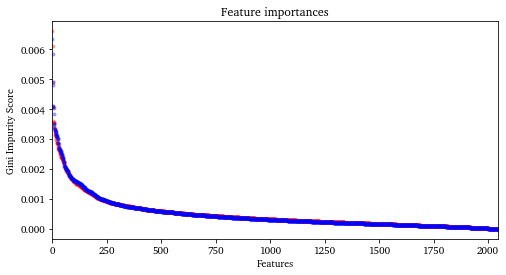

In [101]:
# Plot the impurity-based feature importances of the forest
plt.figure(1,figsize=[8,4])
plt.title("Feature importances")
plt.scatter(range(X_var0.shape[1]), gini_importances[gini_indices],
        color="r", marker='.',alpha=0.3)
plt.scatter(range(X_var0.shape[1]), entr_importances[entr_indices],
        color="b", marker='.',alpha=0.3)
plt.xlabel("Features")
plt.ylabel("Gini Impurity Score")
plt.xlim([-1, X_var0.shape[1]])
plt.savefig("../_output/gi_rf_fp_1030.svg", dpi=300)
plt.show()

In [103]:
# Print the feature ranking

# create a pandas dataframe with all relevant information about the Gini impurity based feature importance
gi_fi = pd.DataFrame(columns=['Ranking','Feature','Score','StdDev'], index=range(len(gini_importances)))
gi_fi['Ranking'] = range(1,len(gini_importances)+1)
gi_fi['Feature'] = gini_features
gi_fi['Score'] = gini_importances[gini_indices]
gi_fi['StdDev'] = gini_std[gini_indices]

# create a pandas dataframe with all relevant information about the entropy based feature importance
en_fi = pd.DataFrame(columns=['Ranking','Feature','Score','StdDev'], index=range(len(entr_importances)))
en_fi['Ranking'] = range(1,len(entr_importances)+1)
en_fi['Feature'] = entr_features
en_fi['Score'] = entr_importances[entr_indices]
en_fi['StdDev'] = entr_std[entr_indices]

In [106]:
# Gini impurity based feature importance is exported along with standard deviation and the feature names
gi_fi.to_csv('../_output/gi_rf_fp_1030.csv',index=False)
# Gini impurity based feature importance is exported along with standard deviation and the feature names
en_fi.to_csv('../_output/en_rf_fp_1030.csv',index=False)